### Descargar el archivo

In [15]:
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id=1QrME0JqxWHChkEfFkrJz8AQlCihVBBgI" -O PetImages.zip


--2025-05-16 18:51:56--  https://docs.google.com/uc?export=download&id=1QrME0JqxWHChkEfFkrJz8AQlCihVBBgI
Resolving docs.google.com (docs.google.com)... 172.217.169.78, 2a00:1450:4009:822::200e
Connecting to docs.google.com (docs.google.com)|172.217.169.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1QrME0JqxWHChkEfFkrJz8AQlCihVBBgI&export=download [following]
--2025-05-16 18:51:56--  https://drive.usercontent.google.com/download?id=1QrME0JqxWHChkEfFkrJz8AQlCihVBBgI&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 216.58.204.65, 2a00:1450:4009:826::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|216.58.204.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2425 (2.4K) [text/html]
Saving to: ‘PetImages.zip’

PetImages.zip       100%[===================>]   2.37K  --.-KB/s    in 0s      

2025-05-16 18:51:5

In [16]:
!unzip PetImages.zip -d PetImages


Archive:  PetImages.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of PetImages.zip or
        PetImages.zip.zip, and cannot find PetImages.zip.ZIP, period.


In [17]:
!pip install gdown



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [18]:
!gdown --id 1QrME0JqxWHChkEfFkrJz8AQlCihVBBgI -O PetImages.zip


/usr/local/python/3.12.1/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(


Downloading...
From (original): https://drive.google.com/uc?id=1QrME0JqxWHChkEfFkrJz8AQlCihVBBgI
From (redirected): https://drive.google.com/uc?id=1QrME0JqxWHChkEfFkrJz8AQlCihVBBgI&confirm=t&uuid=1e480146-0fcd-43ce-842e-6f36b45bdf5f
To: /workspaces/ulla-clasificador_de_imagenes/PetImages.zip
100%|█████████████████████████████████████████| 836M/836M [00:05<00:00, 162MB/s]


### Descomprimir el ZIP

In [19]:
!unzip PetImages.zip -d PetImages


Archive:  PetImages.zip
replace PetImages/__MACOSX/._PetImages? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


### Limpiar imágenes corruptas y organizar en train/ y validation/

In [ ]:
import os
import shutil
from PIL import Image
from tqdm import tqdm
import random

# Rutas
ORIG_DATASET_DIR = 'PetImages/PetImages'
DEST_BASE_DIR = 'data'

# Crear estructura de carpetas
for split in ['train', 'validation']:
    for label in ['Cat', 'Dog']:
        os.makedirs(os.path.join(DEST_BASE_DIR, split, label), exist_ok=True)

# Función para validar y mover imágenes
def mover_y_validar(clase):
    origen = os.path.join(ORIG_DATASET_DIR, clase)
    archivos = os.listdir(origen)
    random.shuffle(archivos)
    split = int(len(archivos) * 0.8)
    train_files = archivos[:split]
    val_files = archivos[split:]

    for conjunto, destino in [(train_files, 'train'), (val_files, 'validation')]:
        for archivo in tqdm(conjunto, desc=f'{clase} → {destino}'):
            src = os.path.join(origen, archivo)
            dst = os.path.join(DEST_BASE_DIR, destino, clase, archivo)
            try:
                with Image.open(src) as img:
                    img.verify()
                shutil.copy(src, dst)
            except:
                continue  # Ignora archivos corruptos

# Procesar ambas clases
mover_y_validar('Cat')
mover_y_validar('Dog')

print("✅ Dataset listo en carpeta 'data/train' y 'data/validation'")


Dog → validation:   3%|▎         | 69/2501 [00:00<00:03, 689.30it/s]/home/codespace/.local/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
Dog → validation: 100%|██████████| 2501/2501 [00:03<00:00, 666.40it/s]

✅ Dataset listo en carpeta 'data/train' y 'data/validation'


### Carga del dataset real

In [2]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 29.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 58.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 68.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy90m╺━━━━━━━━━━━━━━━━━━━━━━━━ 10/26 [opt-einsum]-data-server]
    Found existing installation: numpy 2.2.5━━━━━━━━━━━━━━━━━━ 10/26 [opt-einsum]
    Uninstalling numpy-2.2.5:━━━━━━━━━━━━━━━━━━━━━━━━ 10/26 [opt-einsum]
      Successfully uninstalled n

In [3]:
import tensorflow as tf
print("✅ TensorFlow version:", tf.__version__)


2025-05-16 20:13:36.746243: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-16 20:13:36.770012: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 20:13:37.015659: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 20:13:37.203063: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747426417.435236    3638 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747426417.52

ModuleNotFoundError: No module named 'numpy.typing'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = 'data/train'
val_path = 'data/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 19996 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


**Visualizar 9 imágenes de perros**

/tmp/ipykernel_6182/3999114337.py:18: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_6182/3999114337.py:19: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.savefig("perros_muestra.png")
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


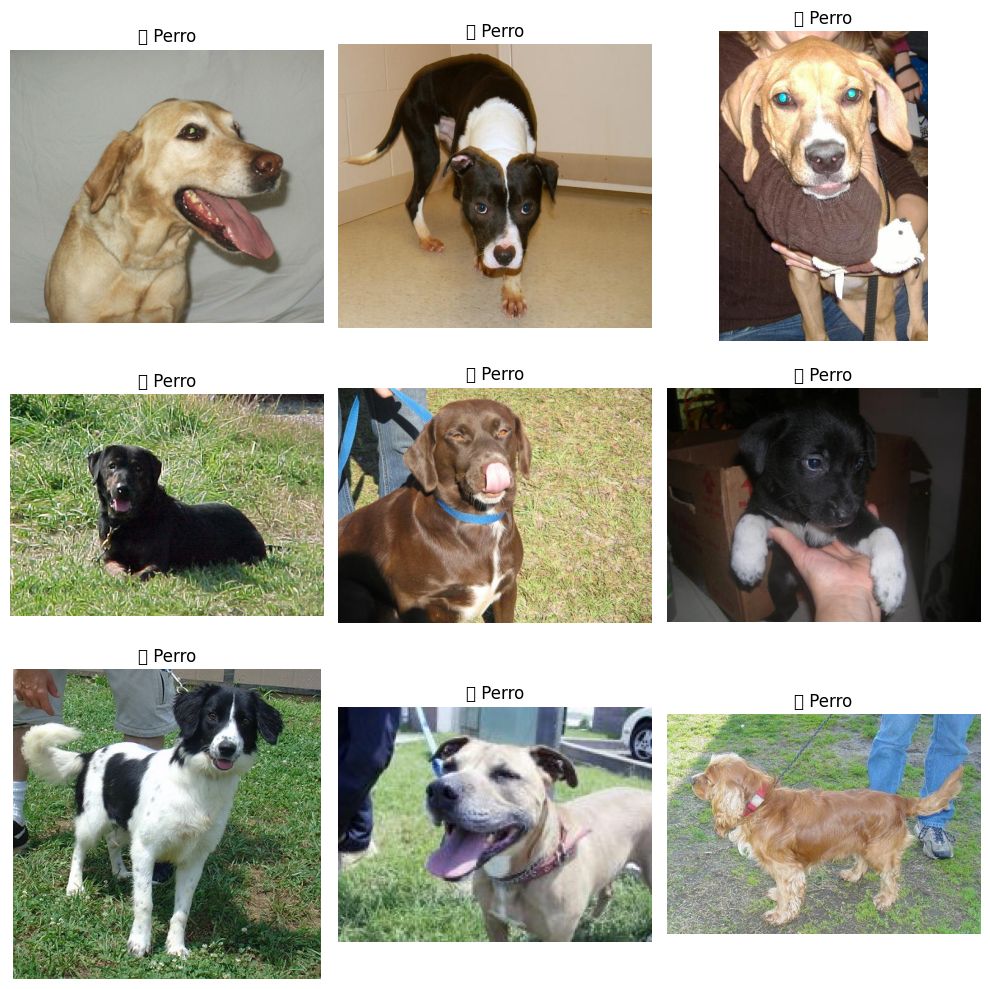

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Ruta a las imágenes de perros en entrenamiento
dog_dir = 'data/train/Dog'
dog_imgs = os.listdir(dog_dir)[:9]  # Primeras 9

plt.figure(figsize=(10, 10))
for i, fname in enumerate(dog_imgs):
    img_path = os.path.join(dog_dir, fname)
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title("🐶 Perro")
    plt.axis('off')

plt.tight_layout()
plt.savefig("perros_muestra.png")
plt.show()


**Visualizar 9 imágenes de gatos**

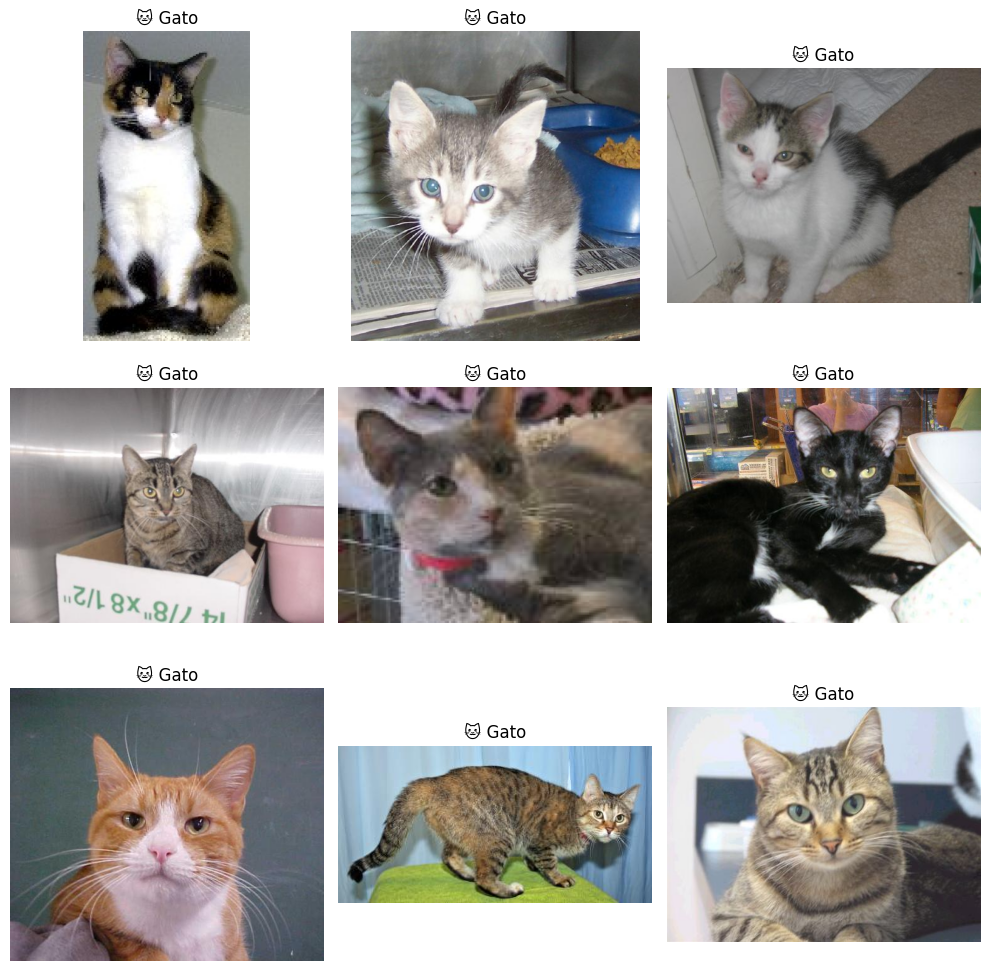

In [25]:
# Ruta a las imágenes de gatos en entrenamiento
cat_dir = 'data/train/Cat'
cat_imgs = os.listdir(cat_dir)[:9]  # Primeras 9

plt.figure(figsize=(10, 10))
for i, fname in enumerate(cat_imgs):
    img_path = os.path.join(cat_dir, fname)
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title("🐱 Gato")
    plt.axis('off')

plt.tight_layout()
plt.savefig("gatos_muestra.png")
plt.show()

### Construcción del modelo CNN

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-16 18:11:58.074341: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Entrenamiento del modelo con EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=312,            # 10000 imágenes / 32 batch
    epochs=20,
    validation_data=val_generator,
    validation_steps=78,            # 2500 imágenes / 32 batch
    callbacks=[early_stop]
)


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 206s 659ms/step - accuracy: 0.7507 - loss: 0.5108 - val_accuracy: 0.8085 - val_loss: 0.4348
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 262s 840ms/step - accuracy: 0.7439 - loss: 0.5130 - val_accuracy: 0.8085 - val_loss: 0.4264
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.8750 - loss: 0.3963 - val_accuracy: 0.7993 - val_loss: 0.4306
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 263s 843ms/step - accuracy: 0.7576 - loss: 0.4911 - val_accuracy: 0.8097 - val_loss: 0.4091
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 261s 838ms/step - accuracy: 0.7593 - loss: 0.4931 - val_accuracy: 0.8101 - val_loss: 0.4190
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8125 - loss: 0.4795 - val_accuracy: 0.7993 - val_loss: 0.4338
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 199s 638ms/step - accuracy: 0.7684 - loss: 0.4816 - val_accuracy: 0.7985 - val_loss: 0.4185


### Guardar el modelo entrenado

In [22]:
model.save('modelo_perros_gatos.h5')

### Visualizar y analizar el rendimiento

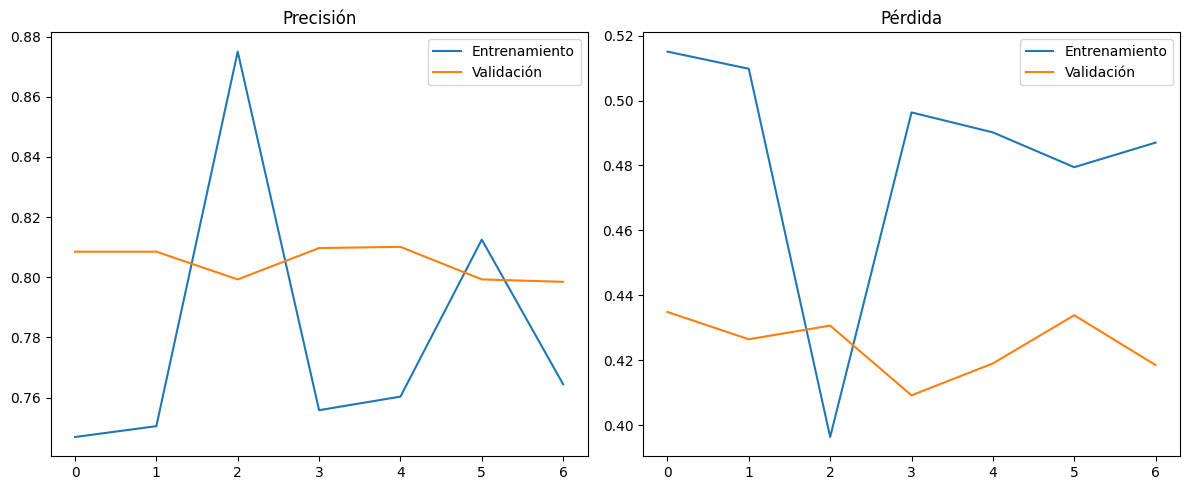

In [23]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Entrenamiento')
plt.plot(epochs, val_acc, label='Validación')
plt.legend()
plt.title('Precisión')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Entrenamiento')
plt.plot(epochs, val_loss, label='Validación')
plt.legend()
plt.title('Pérdida')

plt.tight_layout()
plt.show()


**¿Qué nos dice esta gráfica?**
**Precisión (Accuracy):**

    La línea azul (entrenamiento) fluctúa bastante, lo cual es típico en datasets con variabilidad.

    La línea naranja (validación) es estable en torno al 80%, lo que es excelente.

    No hay overfitting severo: el modelo generaliza bien.

**Pérdida (Loss):**

    La pérdida de validación también es estable, mientras que la de entrenamiento varía más.

    Hay un pequeño indicio de overfitting a partir de la epoch 5–6, lo cual justifica que EarlyStopping detuviera el entrenamiento. ¡Buen uso! 

**Conclusión rápida:**

    Tu modelo logra una val_accuracy cercana al 80%.

    No hay divergencia crítica entre entrenamiento y validación.

    ¡Es un modelo completamente funcional! 💪

### Hacer predicciones con imágenes nuevas

In [1]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

2025-05-16 20:16:45.553971: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-16 20:16:45.556287: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 20:16:45.560069: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 20:16:45.569194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747426605.584230    6578 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747426605.58

In [2]:
modelo = load_model('modelo_perros_gatos.h5')

2025-05-16 20:16:54.404745: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Guardar 5 predicciones de gatos y 5 de perros en /predicciones_demo/

In [7]:

# Crear carpeta para guardar las predicciones
os.makedirs('predicciones_demo', exist_ok=True)

# Función para guardar n imágenes predichas de una clase
def guardar_predicciones(clase_real, n=5):
    folder = f'data/validation/{clase_real}'
    imagenes = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    guardadas = 0

    while guardadas < n:
        img_name = random.choice(imagenes)
        img_path = os.path.join(folder, img_name)

        try:
            with Image.open(img_path) as test:
                test.verify()

            # Preparar la imagen
            img = image.load_img(img_path, target_size=(150, 150))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            # Hacer predicción (modelo con salida sigmoide)
            pred = modelo.predict(img_array, verbose=0)[0][0]
            clase_pred = 'Dog' if pred > 0.5 else 'Cat'
            emoji = '🐶' if clase_pred == 'Dog' else '🐱'

            # Mostrar y guardar la imagen
            plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'Real: {clase_real} | Predicción: {clase_pred} {emoji}')
            filename = f'predicciones_demo/{clase_real.lower()}_{guardadas+1}.png'
            plt.savefig(filename, bbox_inches='tight')
            plt.close()
            guardadas += 1

        except Exception as e:
            print(f"⚠️ Imagen inválida: {img_name} — {e}")

# Ejecutar para ambas clases
guardar_predicciones('Cat', n=5)
guardar_predicciones('Dog', n=5)

print("✅ Imágenes guardadas en la carpeta 'predicciones_demo'")

/tmp/ipykernel_6578/10194906.py:34: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches='tight')


✅ Imágenes guardadas en la carpeta 'predicciones_demo'


### Predicción individual aleatoria (gato o perro)

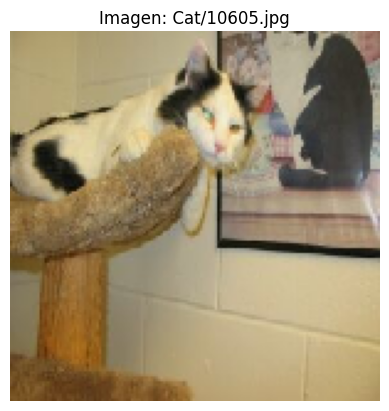

⚠️ Imagen inválida: 10605.jpg — index 1 is out of bounds for axis 0 with size 1


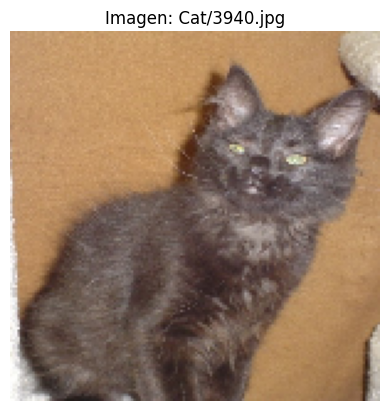

⚠️ Imagen inválida: 3940.jpg — index 1 is out of bounds for axis 0 with size 1


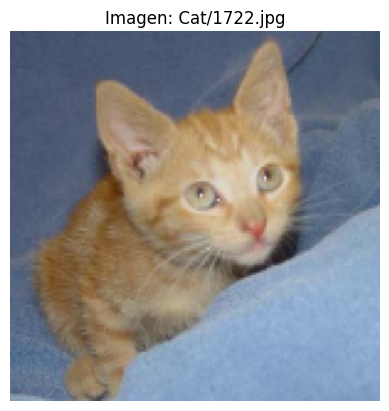

⚠️ Imagen inválida: 1722.jpg — index 1 is out of bounds for axis 0 with size 1


⚠️ Imagen inválida: 5004.jpg — index 1 is out of bounds for axis 0 with size 1


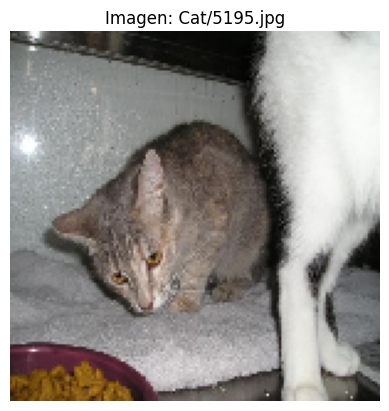

⚠️ Imagen inválida: 5195.jpg — index 1 is out of bounds for axis 0 with size 1


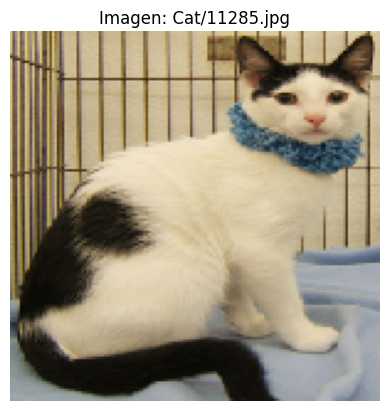

⚠️ Imagen inválida: 11285.jpg — index 1 is out of bounds for axis 0 with size 1


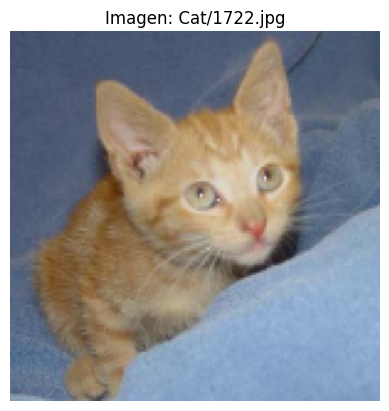

⚠️ Imagen inválida: 1722.jpg — index 1 is out of bounds for axis 0 with size 1


⚠️ Imagen inválida: 11244.jpg — index 1 is out of bounds for axis 0 with size 1


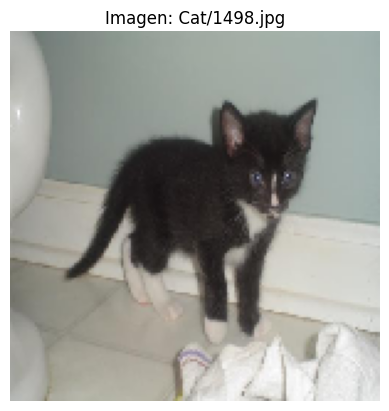

⚠️ Imagen inválida: 1498.jpg — index 1 is out of bounds for axis 0 with size 1


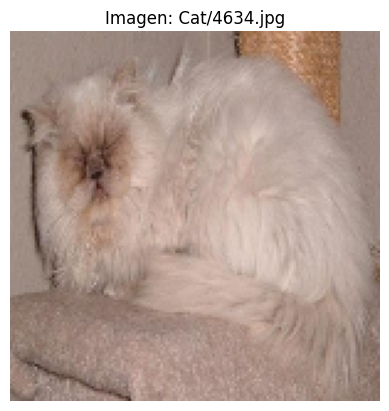

⚠️ Imagen inválida: 4634.jpg — index 1 is out of bounds for axis 0 with size 1


⚠️ Imagen inválida: 6487.jpg — index 1 is out of bounds for axis 0 with size 1


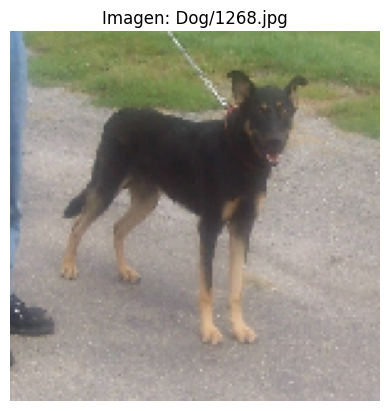

⚠️ Imagen inválida: 1268.jpg — index 1 is out of bounds for axis 0 with size 1


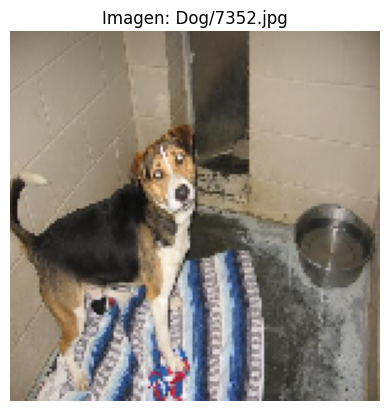

⚠️ Imagen inválida: 7352.jpg — index 1 is out of bounds for axis 0 with size 1


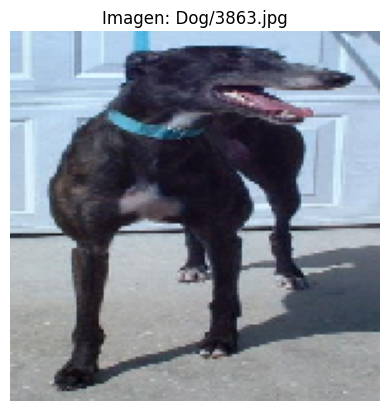

⚠️ Imagen inválida: 3863.jpg — index 1 is out of bounds for axis 0 with size 1


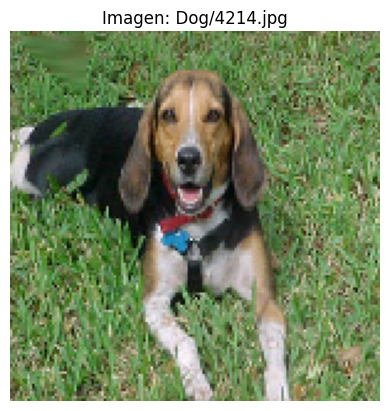

⚠️ Imagen inválida: 4214.jpg — index 1 is out of bounds for axis 0 with size 1


⚠️ Imagen inválida: 4077.jpg — index 1 is out of bounds for axis 0 with size 1


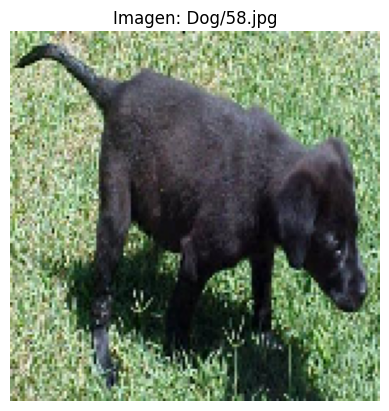

⚠️ Imagen inválida: 58.jpg — index 1 is out of bounds for axis 0 with size 1


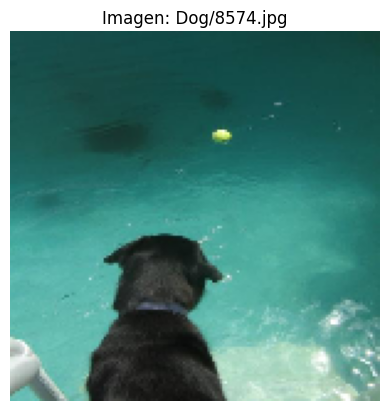

⚠️ Imagen inválida: 8574.jpg — index 1 is out of bounds for axis 0 with size 1


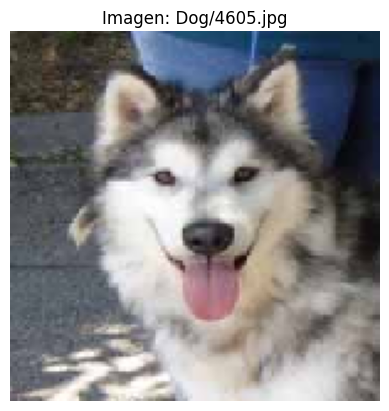

⚠️ Imagen inválida: 4605.jpg — index 1 is out of bounds for axis 0 with size 1


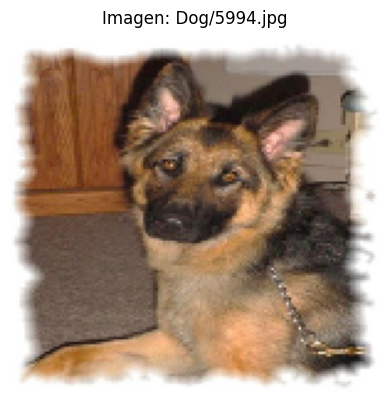

⚠️ Imagen inválida: 5994.jpg — index 1 is out of bounds for axis 0 with size 1


In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, random

# Cargar el modelo
modelo = load_model('modelo_perros_gatos.h5')

# Función para mostrar y predecir una imagen
def predecir_una_imagen(clase_real):
    folder = f'data/validation/{clase_real}'
    imagenes = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for intento in range(10):
        img_name = random.choice(imagenes)
        img_path = os.path.join(folder, img_name)
        try:
            with Image.open(img_path) as test:
                test.verify()

            # Cargar y procesar
            img = image.load_img(img_path, target_size=(150, 150))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            # Mostrar imagen
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'Imagen: {clase_real}/{img_name}')
            plt.show()

            # Predicción
            pred = modelo.predict(img_array, verbose=0)[0]
            clase_pred = 'Dog' if pred[1] > pred[0] else 'Cat'
            emoji = '🐶' if clase_pred == 'Dog' else '🐱'

            print(f'✅ Clase real: {clase_real}')
            print(f'🔮 Predicción: {clase_pred} {emoji}')
            print('-' * 30)
            break

        except Exception as e:
            print(f"⚠️ Imagen inválida: {img_name} — {e}")

# Ejecutar para ambas clases
for clase in ['Cat', 'Dog']:
    predecir_una_imagen(clase)


In [4]:
!pip freeze > requirements.txt


## Este proyecto implementa una red neuronal convolucional (CNN) capaz de clasificar imágenes como perros o gatos.

## Se ha utilizado el dataset PetImages y técnicas como data augmentation, early stopping y dropout para mejorar el rendimiento del modelo.
## Además, se incluyen predicciones reales con imágenes aleatorias y visualización clara de resultados.